### Handwritten Digit Classifier 
#### MNIST

This notebook classifies handwritten digits as numbers from 0 to 9. 
We are making CNNs and Keras framework.

In [1]:
from keras.datasets import mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

Using TensorFlow backend.


4


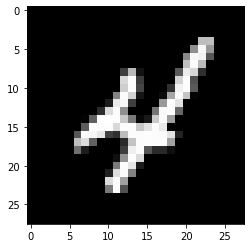

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[9],cmap='gray')
print(y_train[9])

Keras requires a special format which is number of examples, rows, columns and finally depth.

In [3]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


First layer takes input_shape

In [4]:
input_shape = X_train.shape[1:]
print(input_shape)

(28, 28, 1)


Keras expects data in float32

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Normalize the data.
Range is brought down to [0,1]

In [6]:
X_train /= 255
X_test /= 255

Keras expects hot one encoded y

In [7]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### Model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation ='relu',input_shape = input_shape))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(y_train.shape[1],activation = 'softmax'))

model.compile(optimizer=SGD(0.01), loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

Training

In [9]:
batch_size = 32
epochs = 15
history = model.fit(X_train,y_train,batch_size=batch_size, epochs = epochs, verbose=1, validation_data=(X_test,y_test))
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test accuracy',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 147us/step - loss: 0.4433 - accuracy: 0.8672 - val_loss: 0.1692 - val_accuracy: 0.9497
Epoch 2/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.1921 - accuracy: 0.9422 - val_loss: 0.1188 - val_accuracy: 0.9636
Epoch 3/15
60000/60000 [==============================] - 7s 124us/step - loss: 0.1443 - accuracy: 0.9556 - val_loss: 0.0972 - val_accuracy: 0.9701
Epoch 4/15
60000/60000 [==============================] - 7s 124us/step - loss: 0.1202 - accuracy: 0.9629 - val_loss: 0.0833 - val_accuracy: 0.9752
Epoch 5/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.1017 - accuracy: 0.9690 - val_loss: 0.0739 - val_accuracy: 0.9764
Epoch 6/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.0883 - accuracy: 0.9724 - val_loss: 0.0630 - val_accuracy: 0.9802
Epoch 7/15
60000/60000 [==============================] - 7s 1

Plots to visualise

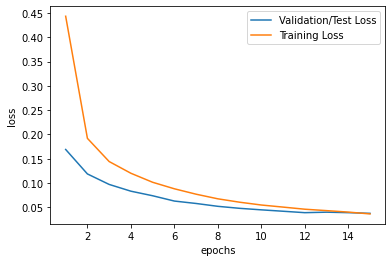

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

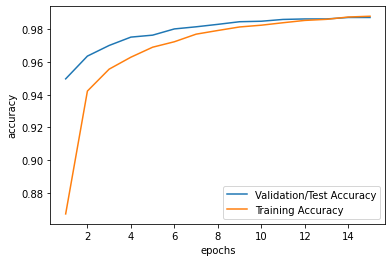

In [11]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

model.save('file_path') is used to save models. This can be loaded
again by importing load_model

```
from keras.models import load_models

new_model = load_model('file_path')
```
This can then be used on new data to classify.


Visualising the model

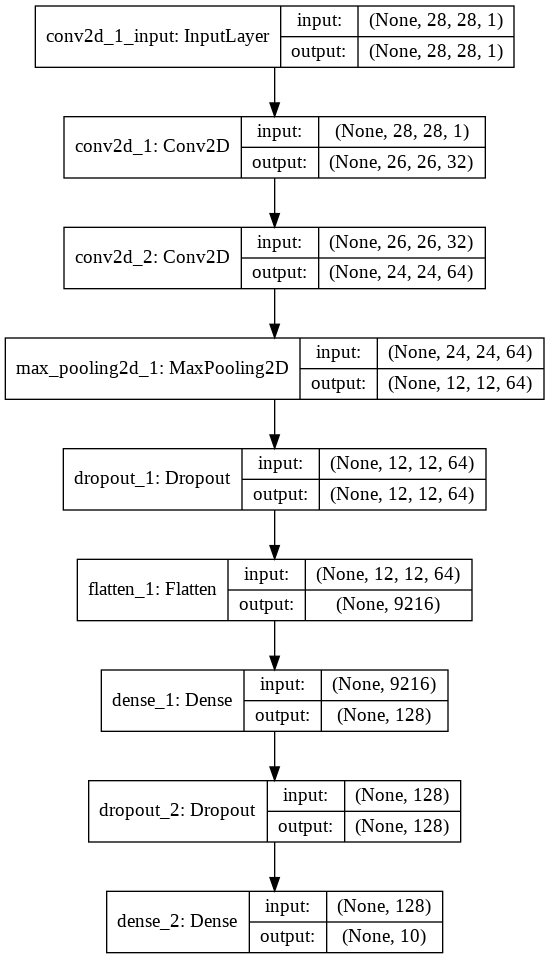

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)